In [1]:
import gymnasium as gym
from gymnasium import spaces
import json
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg
from stable_baselines3.common.env_checker import check_env

from stable_baselines3 import A2C, PPO, DQN
from sb3_contrib import MaskablePPO
from sb3_contrib.common.wrappers import ActionMasker

In [2]:
from scheduler_env.customEnv_repeat import SchedulingEnv

In [3]:
import warnings
# 특정 경고를 무시하도록 필터를 설정합니다.
warnings.filterwarnings("ignore", category=Warning)

In [4]:
env = SchedulingEnv(machine_config_path= "instances/Machines/v0-2.json", job_config_path = "instances/Jobs/v0-3x3-deadline.json")

[[0, 0], [0, 0], [0, 0]]
action : 0, 2
[[0, 0], [0, 0], [0, 1]]


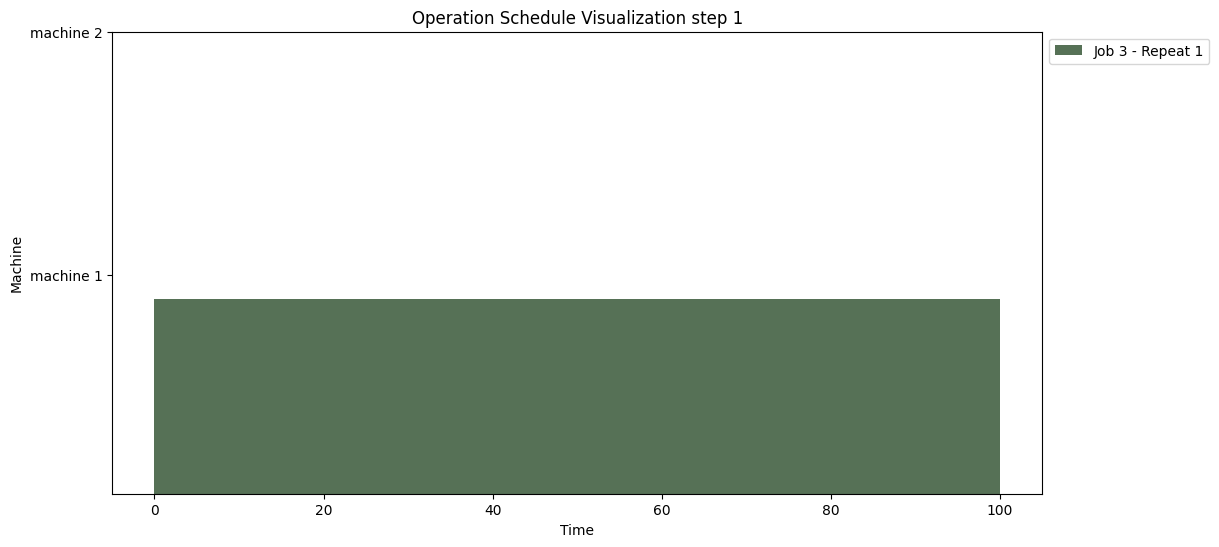

action : 1, 0
[[0, 1], [0, 0], [0, 1]]


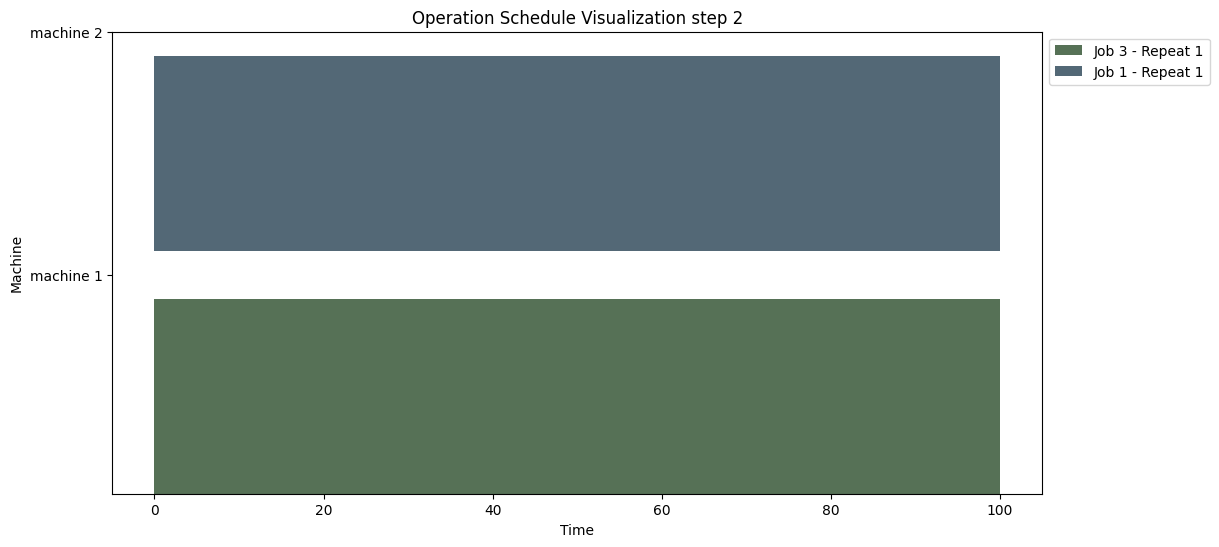

action : 1, 0
[[0, 1], [0, 0], [0, 1]]


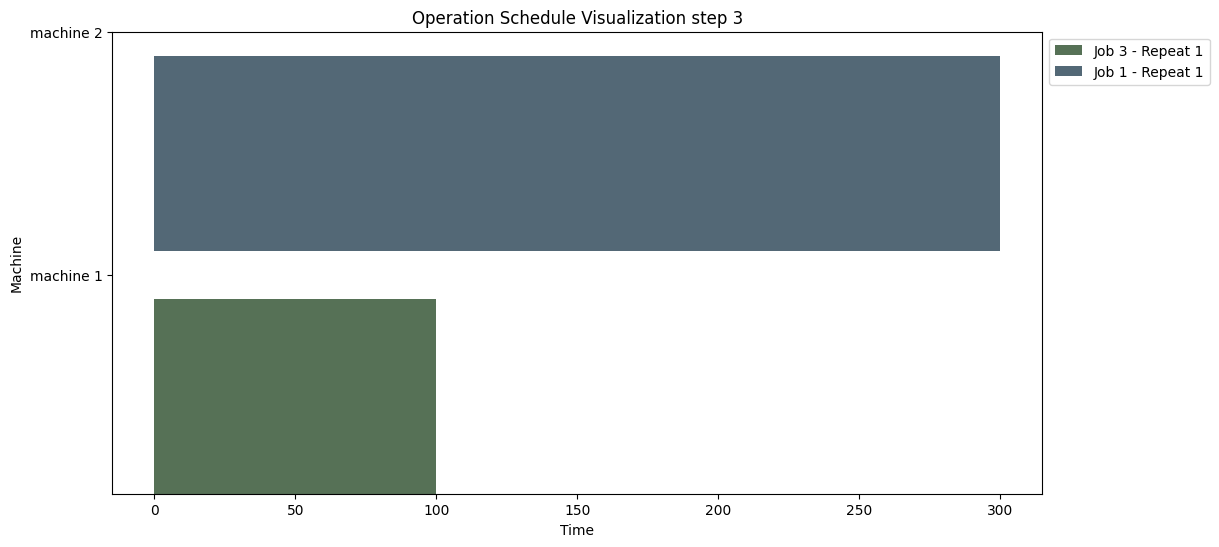

action : 1, 1
[[1, 0], [0, 1], [0, 1]]


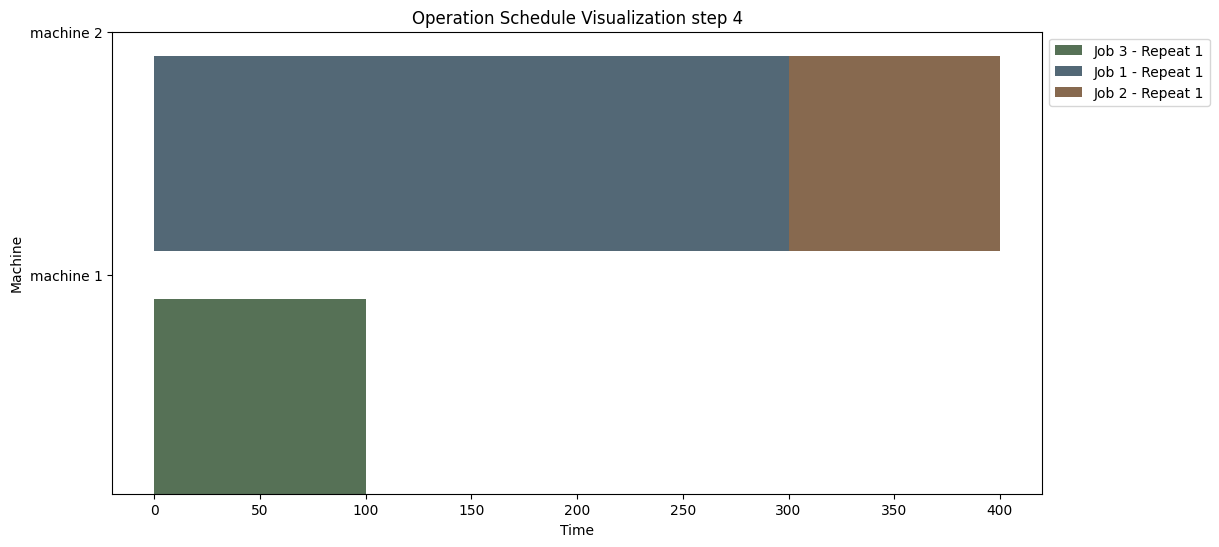

action : 1, 0
[[1, 1], [1, 0], [0, 1]]


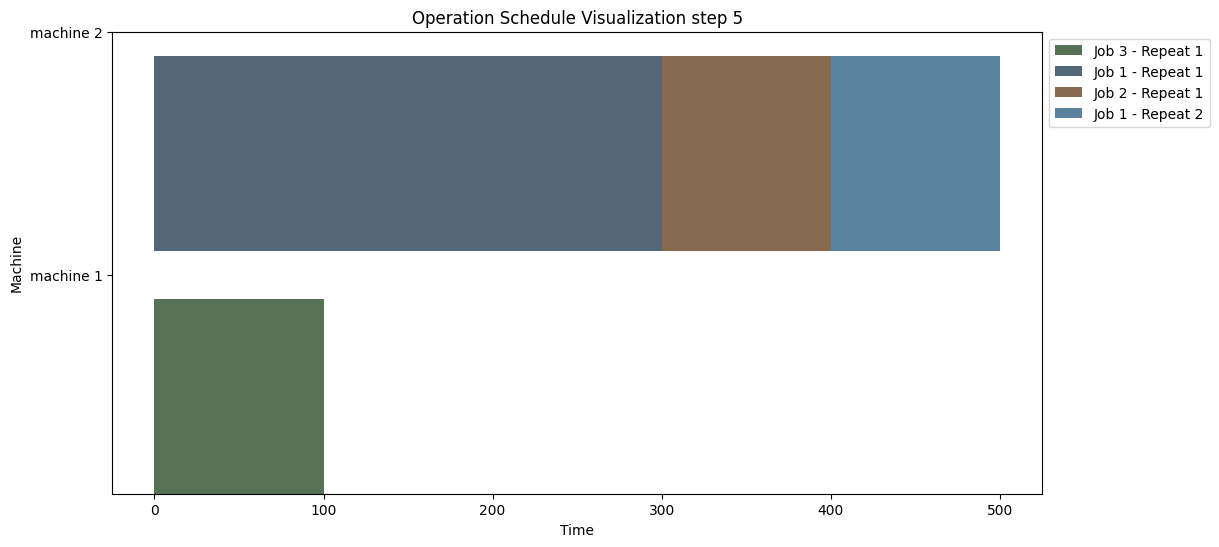

action : 1, 0
[[1, 1], [1, 0], [0, 1]]


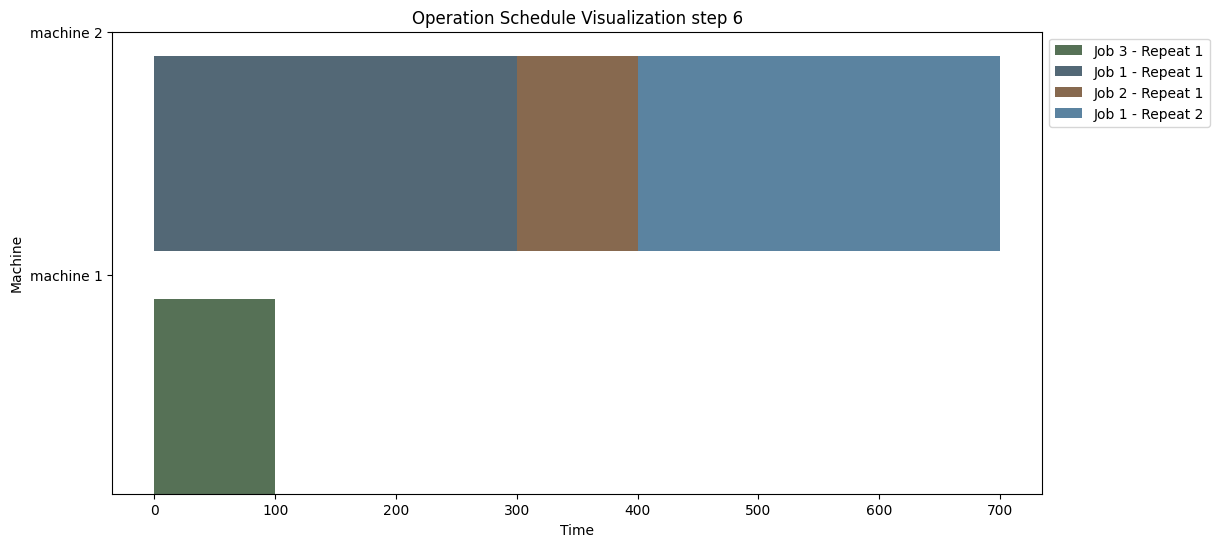

action : 1, 2
[[2, 0], [1, 0], [0, 2]]


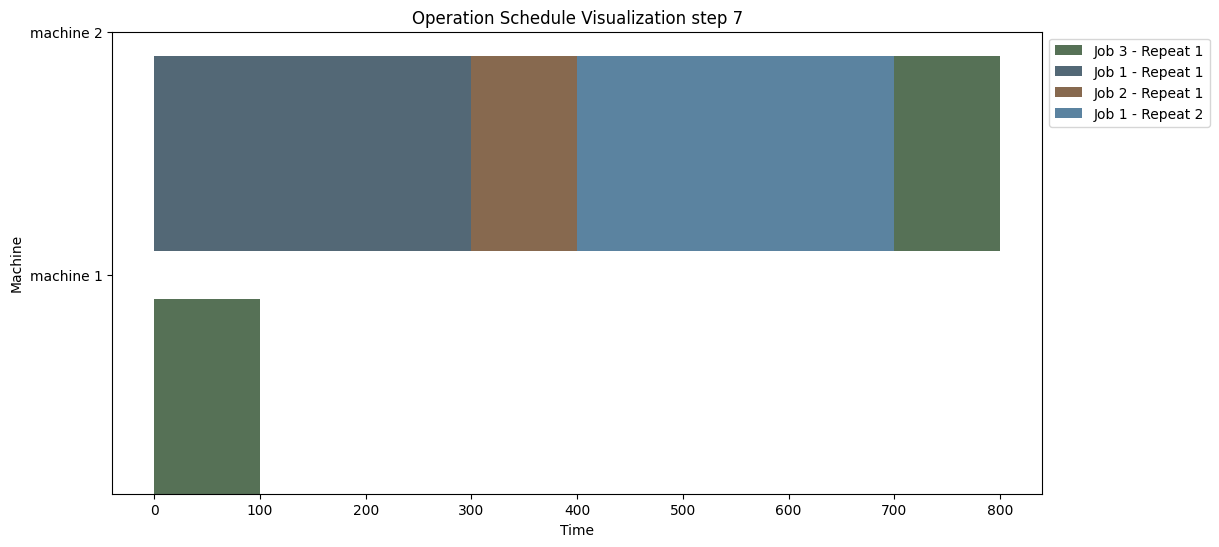

action : 0, 1
[[2, 0], [1, 0], [0, 2]]


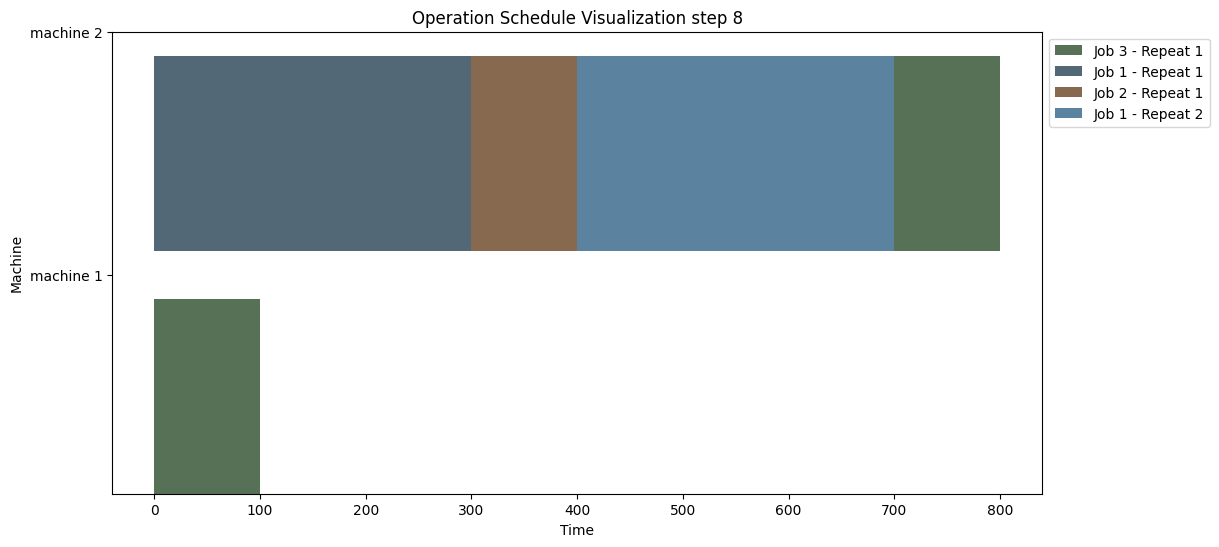

action : 0, 2
[[2, 0], [1, 0], [1, 0]]


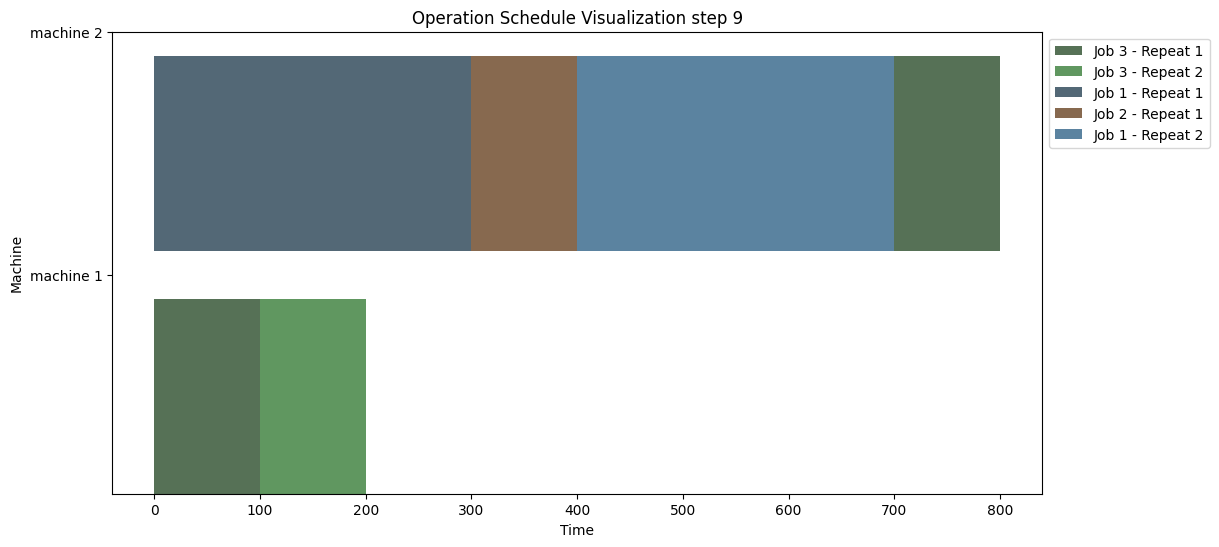

action : 1, 0
[[2, 1], [1, 0], [0, 2]]


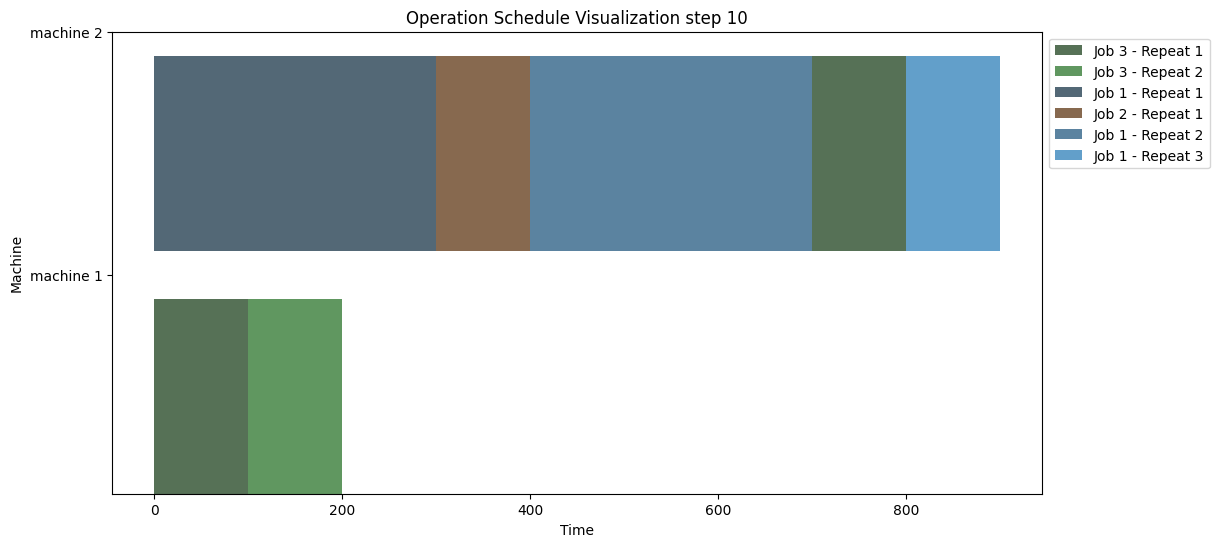

action : 1, 2
[[2, 1], [1, 0], [0, 2]]


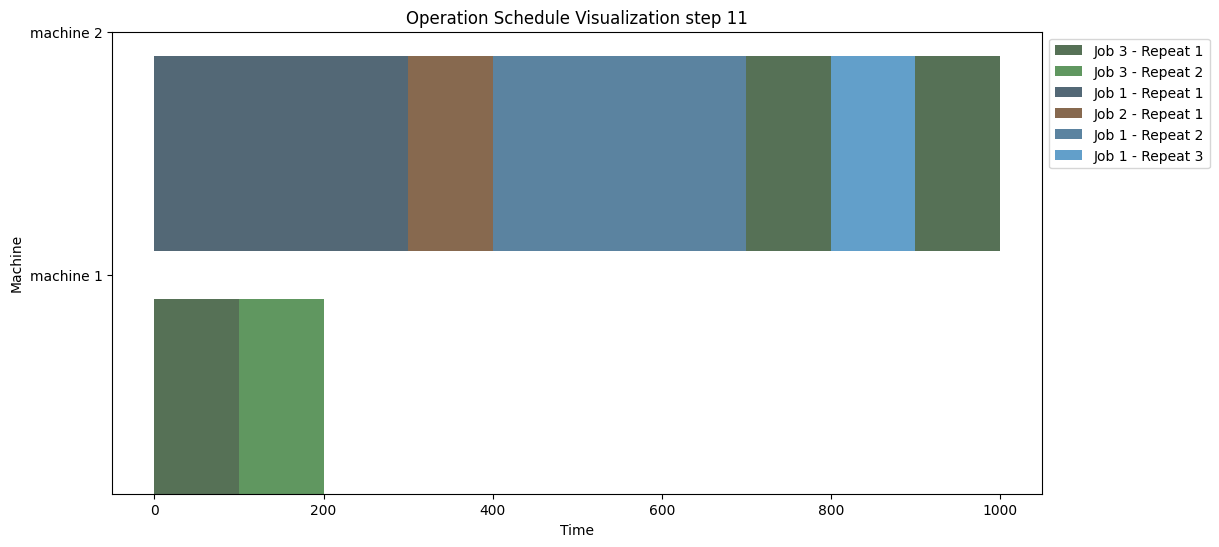

action : 1, 2
[[2, 1], [1, 0], [1, 0]]


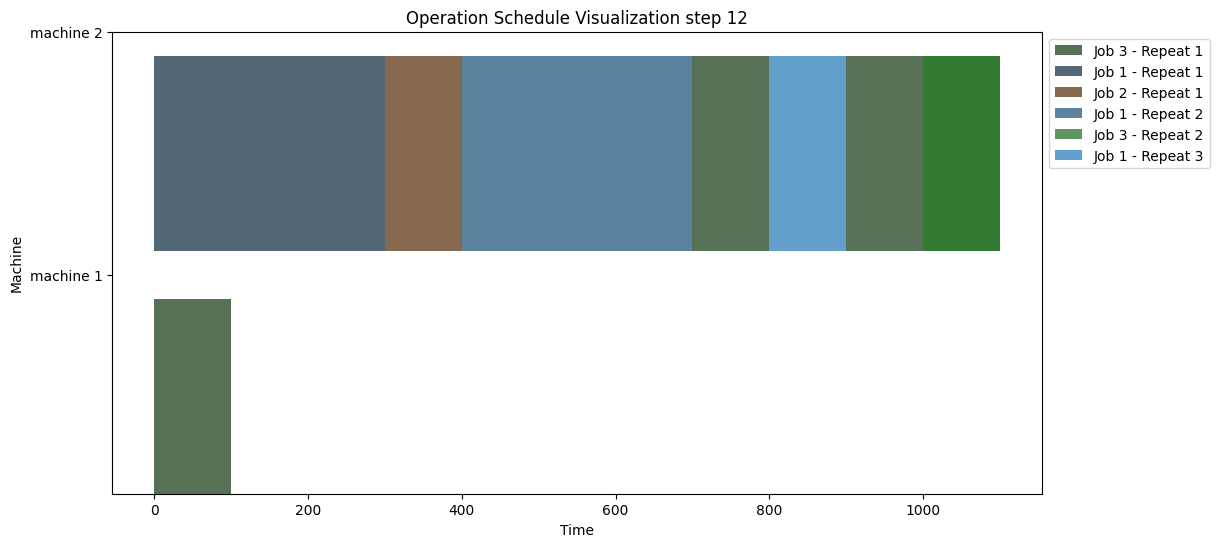

action : 1, 0
[[2, 1], [0, 1], [1, 0]]


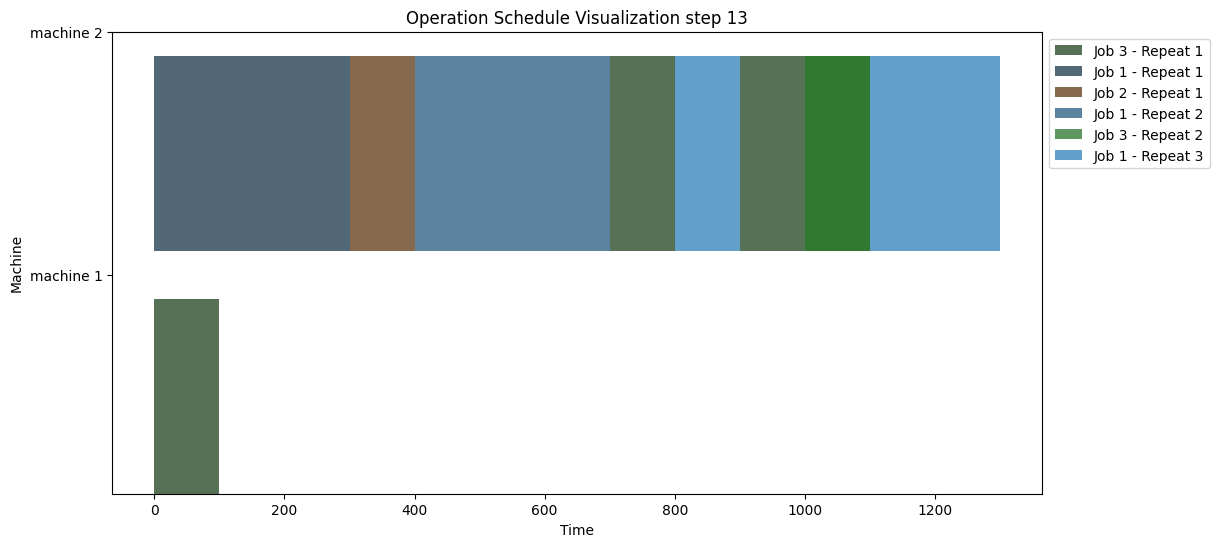

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 0, 2
[[-1, -1], [0, 1], [1, 1]]


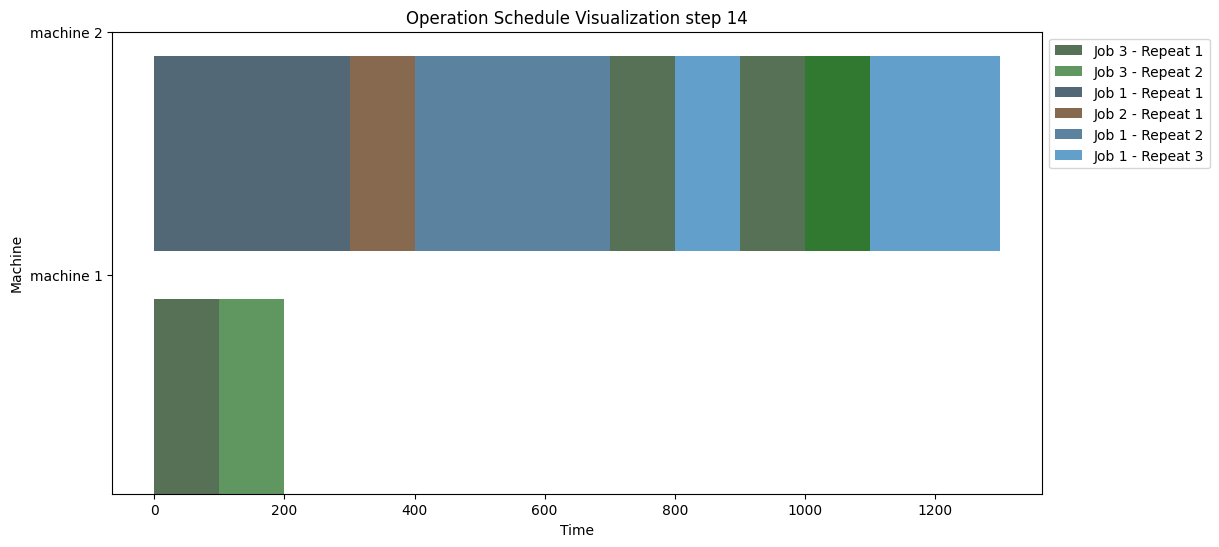

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 1, 1
[[-1, -1], [1, 0], [1, 1]]


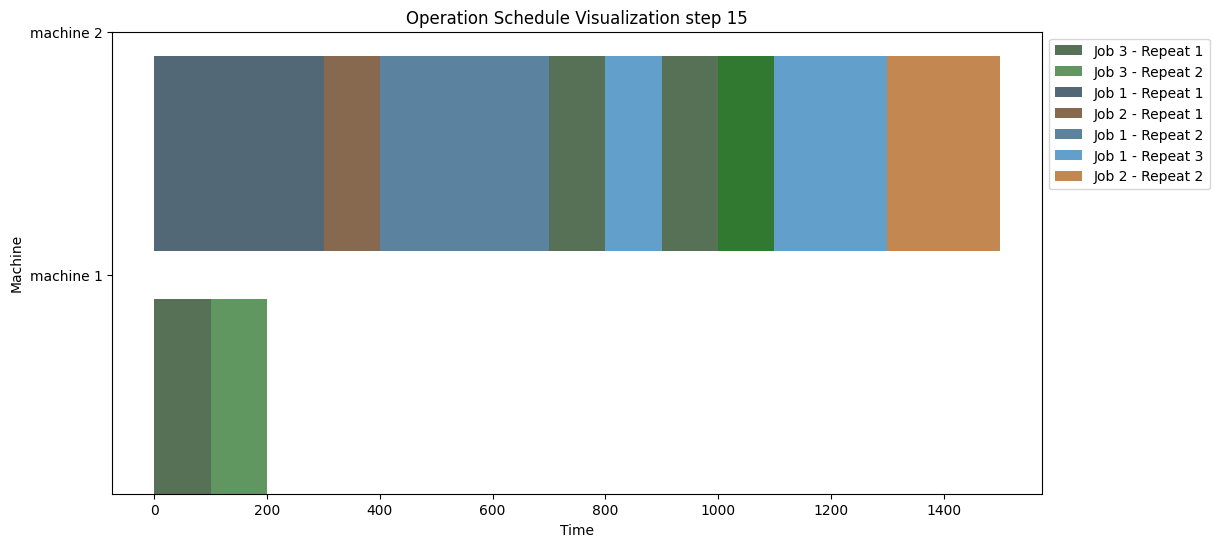

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 1, 1
[[-1, -1], [1, 0], [1, 1]]


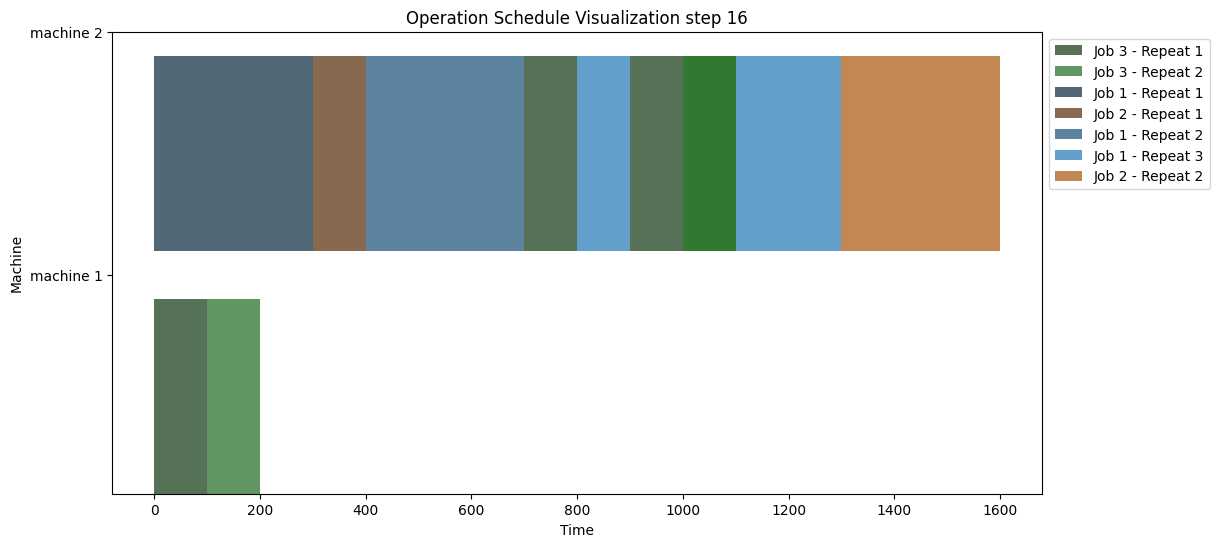

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 1, 2
[[-1, -1], [2, 0], [1, 1]]


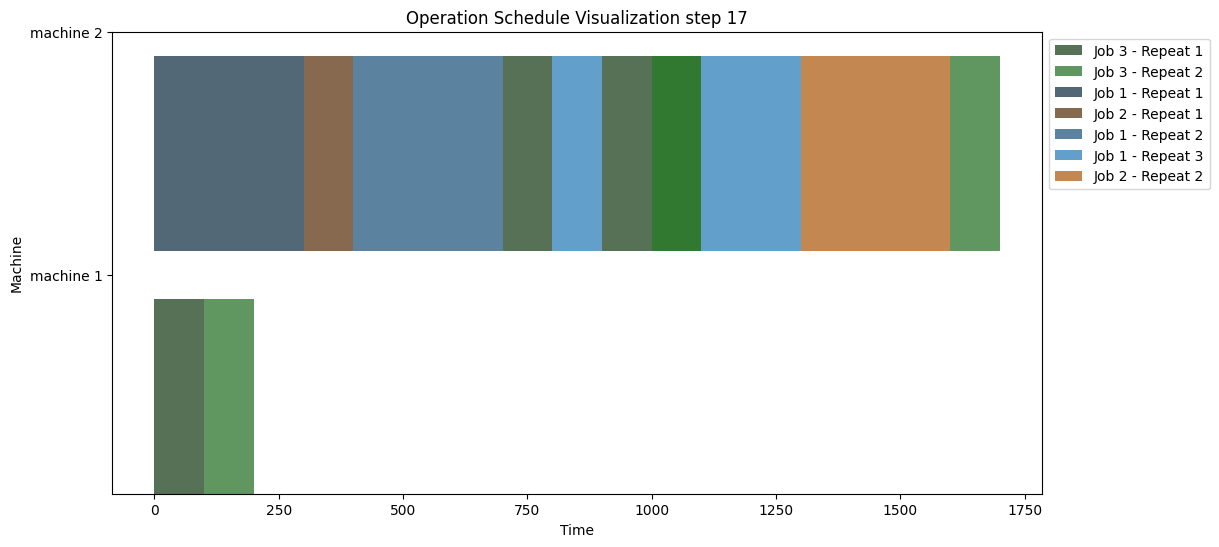

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 1, 2
[[-1, -1], [2, 0], [2, 0]]


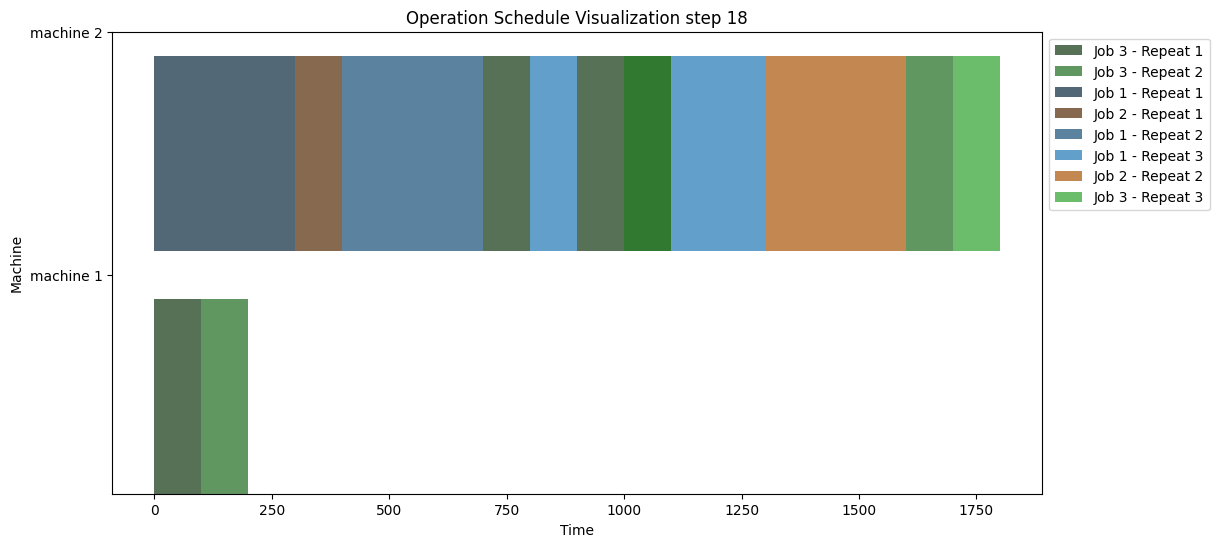

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 1, 2
[[-1, -1], [2, 0], [2, 2]]


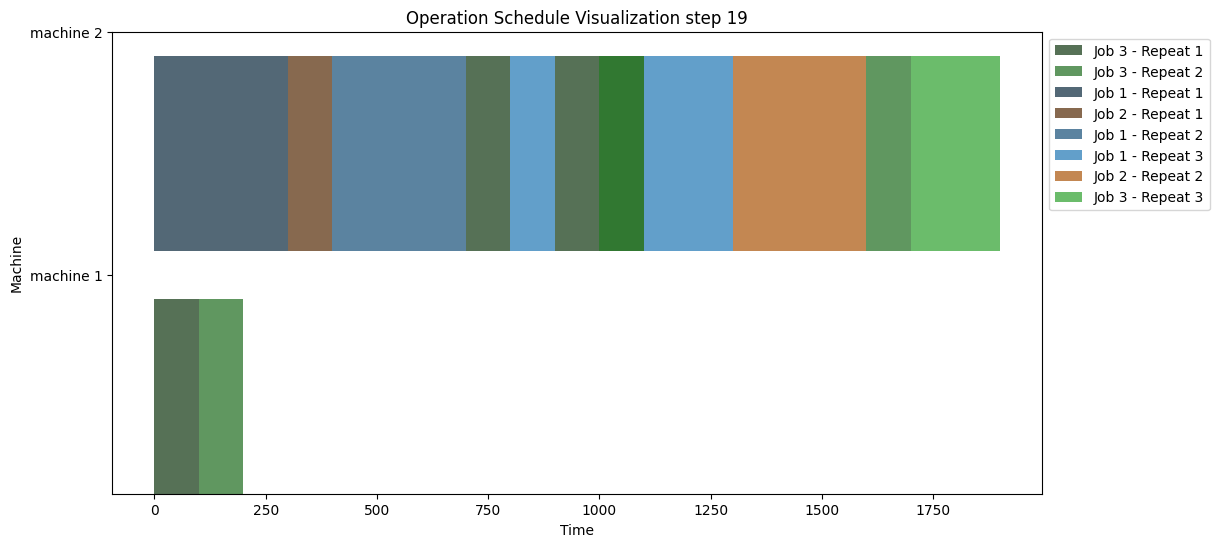

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 0, 1
[[-1, -1], [2, 0], [2, 2]]


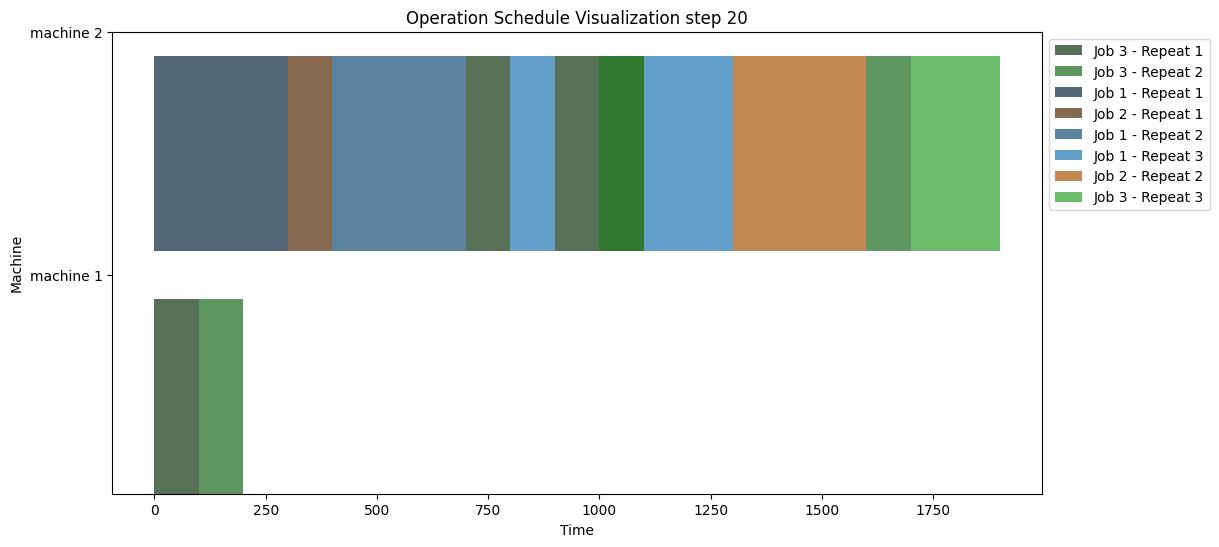

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 1, 0
[[-1, -1], [2, 0], [2, 2]]


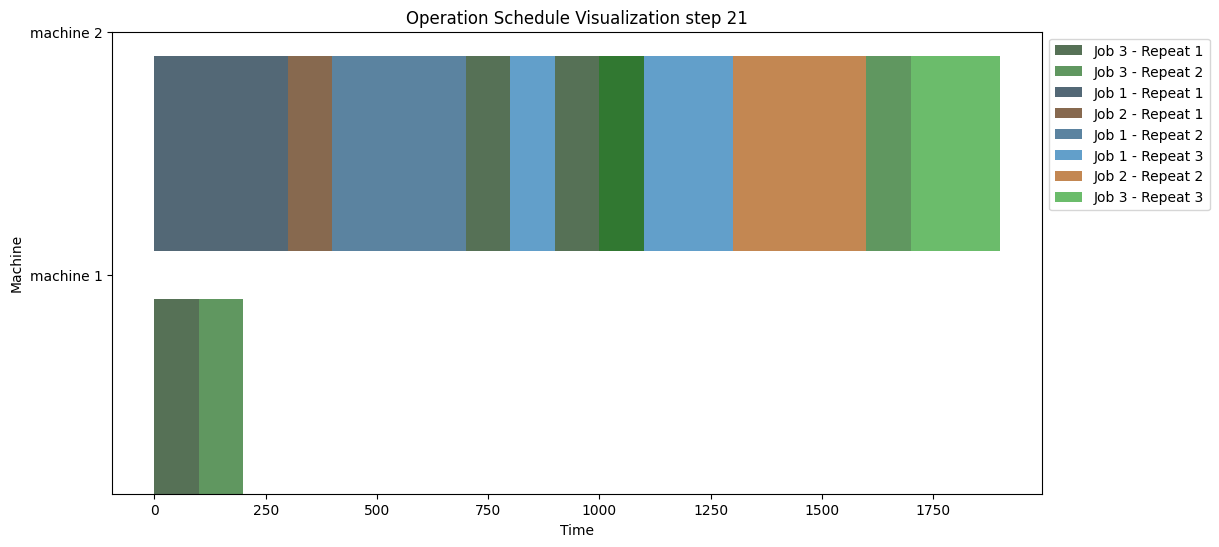

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 0, 0
[[-1, -1], [2, 0], [2, 2]]


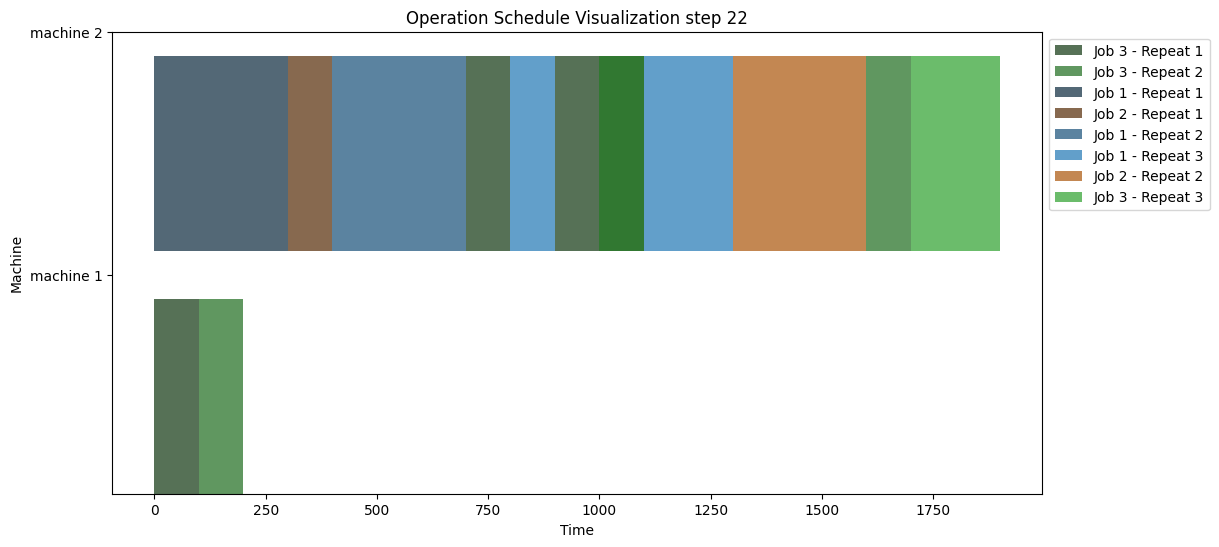

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 0, 1
[[-1, -1], [2, 0], [2, 2]]


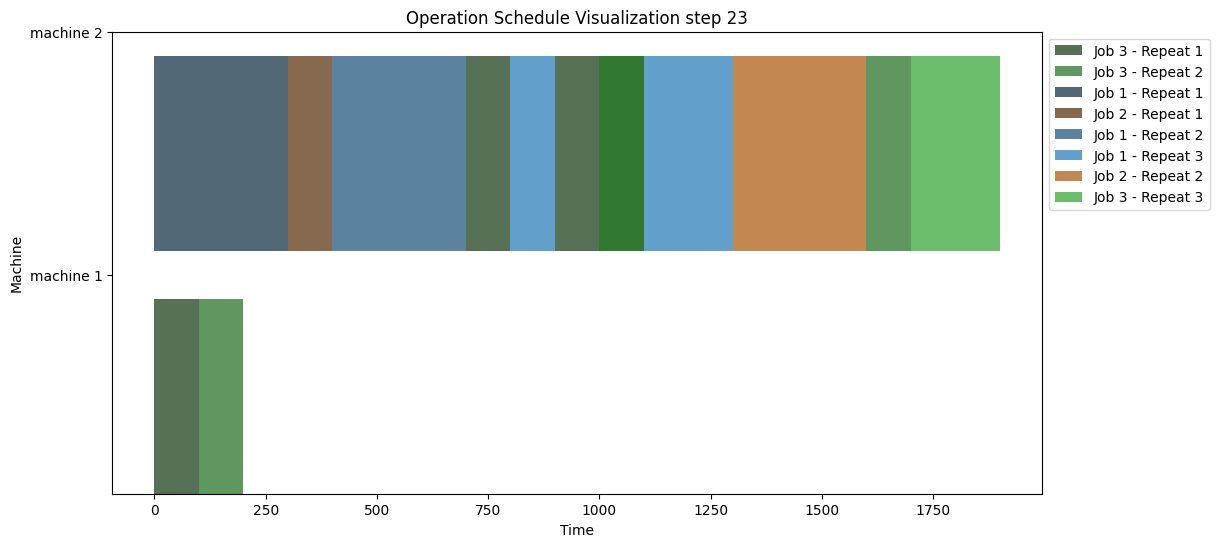

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
action : 0, 2
[[-1, -1], [2, 0], [2, 2]]


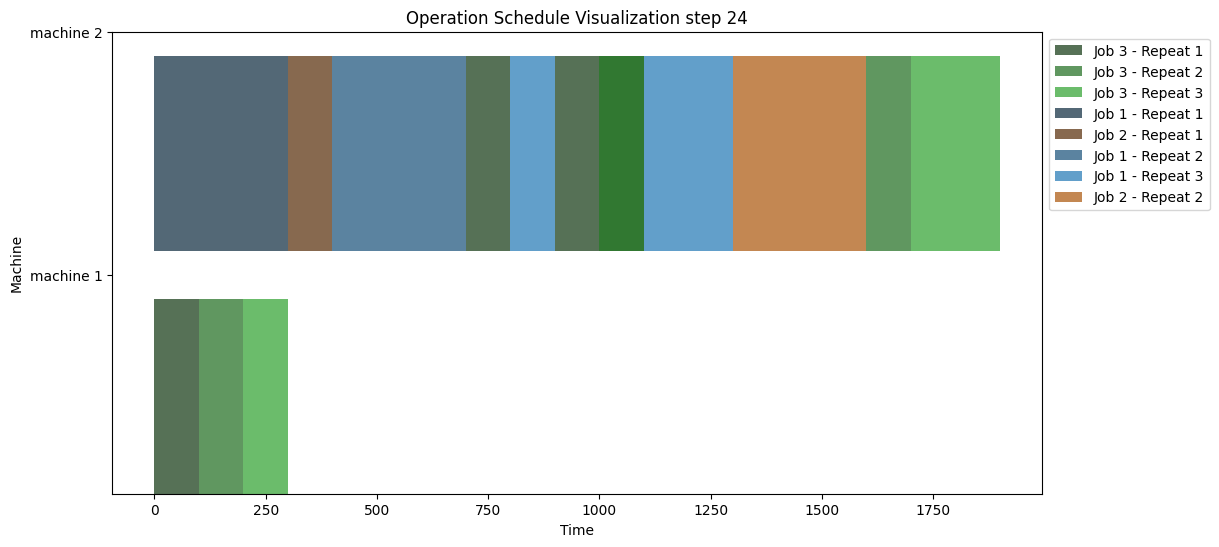

Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 0, 2
[[-1, -1], [2, 0], [-1, -1]]


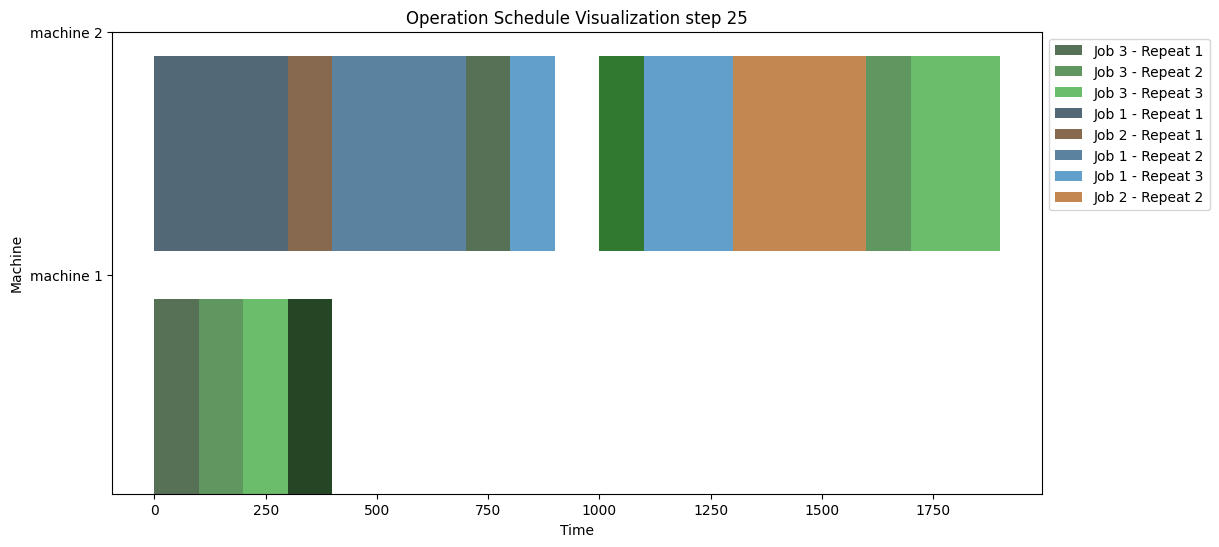

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 1, 0
[[-1, -1], [2, 0], [-1, -1]]


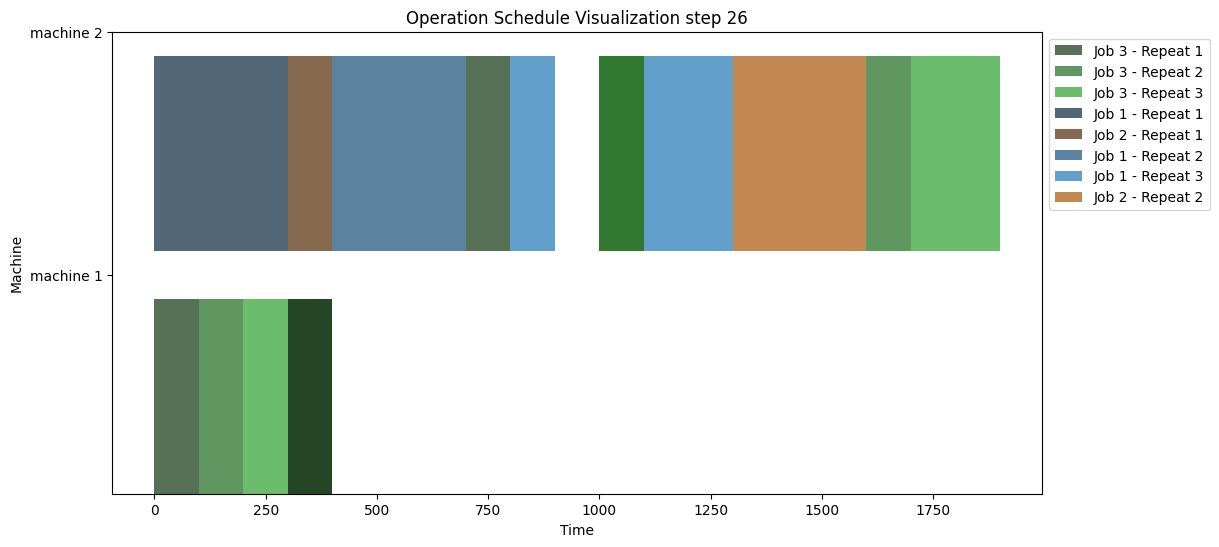

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 1, 2
[[-1, -1], [2, 0], [-1, -1]]


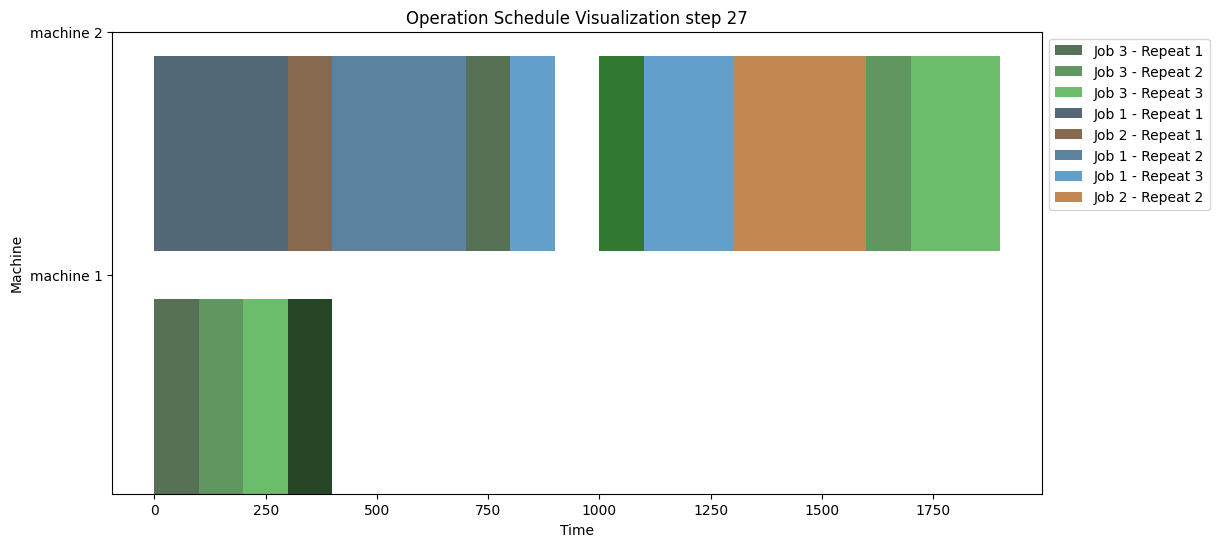

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 1, 1
[[-1, -1], [2, 1], [-1, -1]]


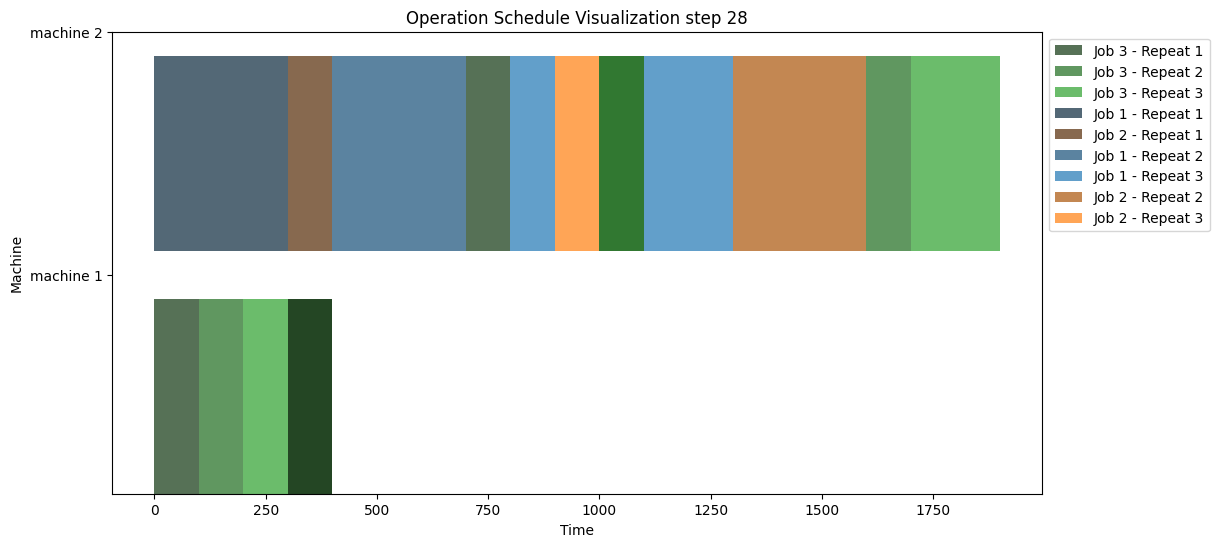

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 1, 0
[[-1, -1], [2, 1], [-1, -1]]


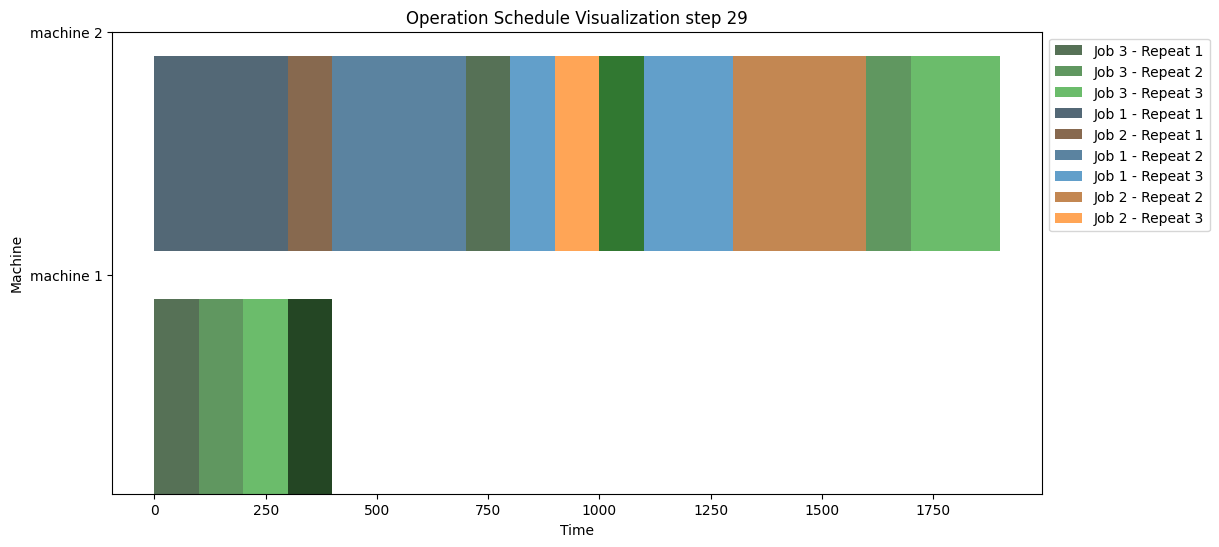

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 1, 0
[[-1, -1], [2, 1], [-1, -1]]


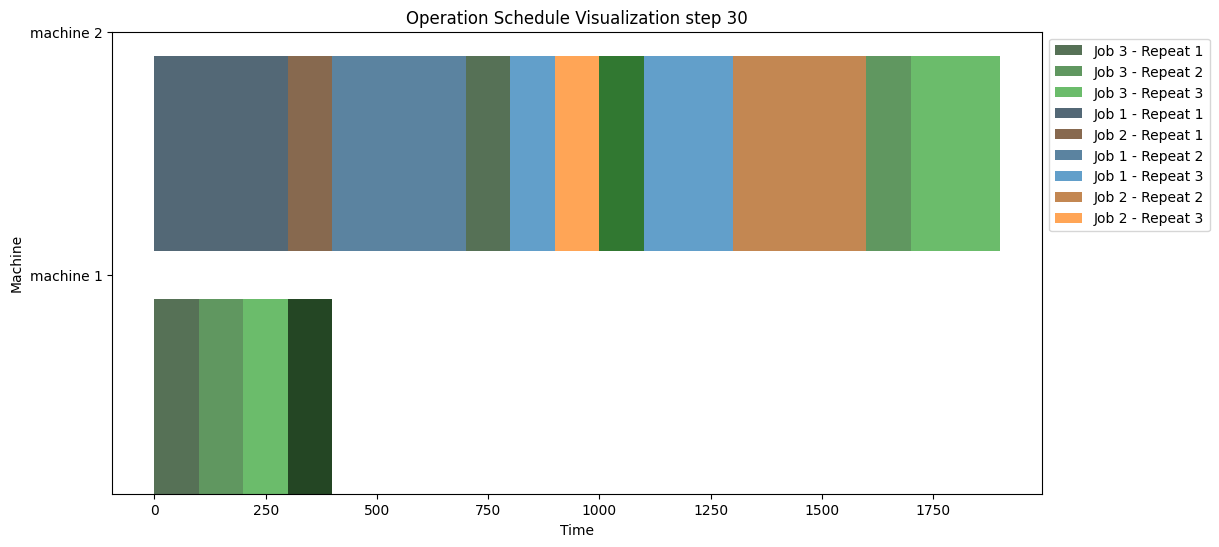

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 1, 2
[[-1, -1], [2, 1], [-1, -1]]


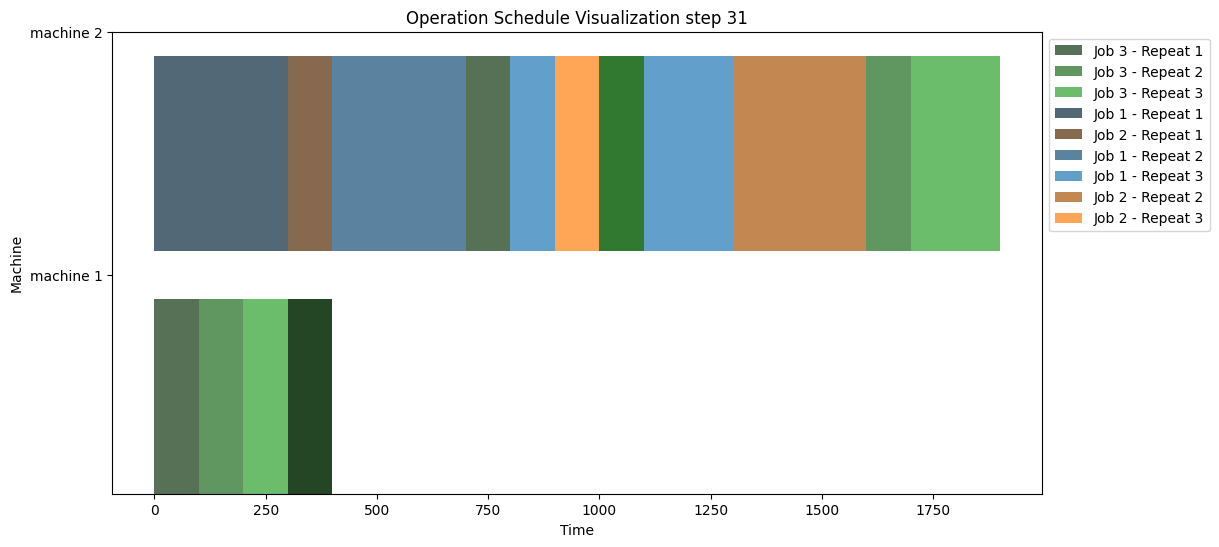

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 0, 0
[[-1, -1], [2, 1], [-1, -1]]


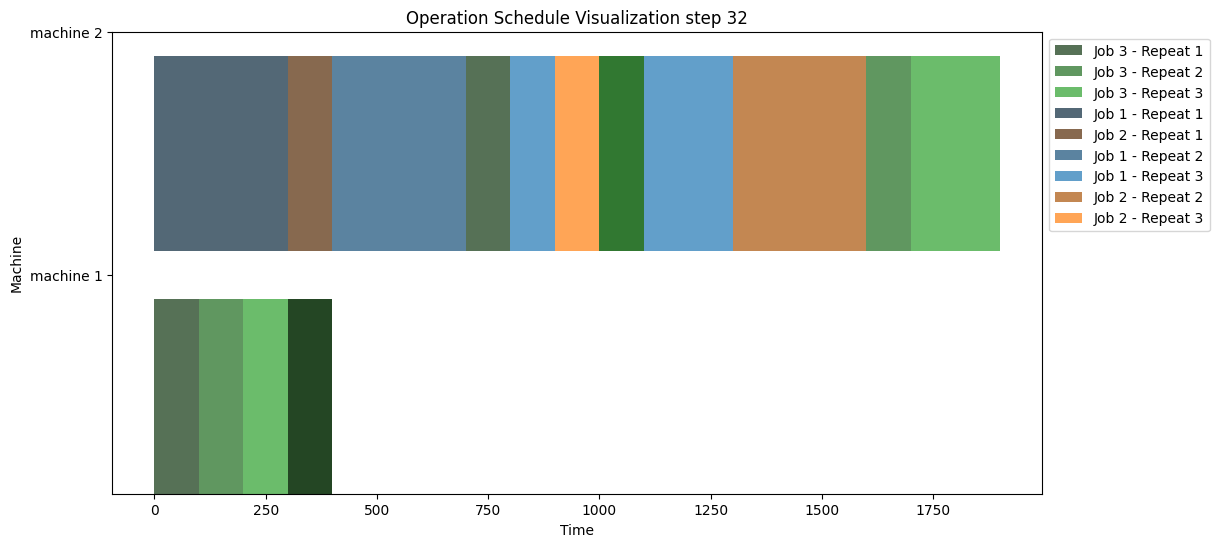

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 1, 1
[[-1, -1], [2, 1], [-1, -1]]


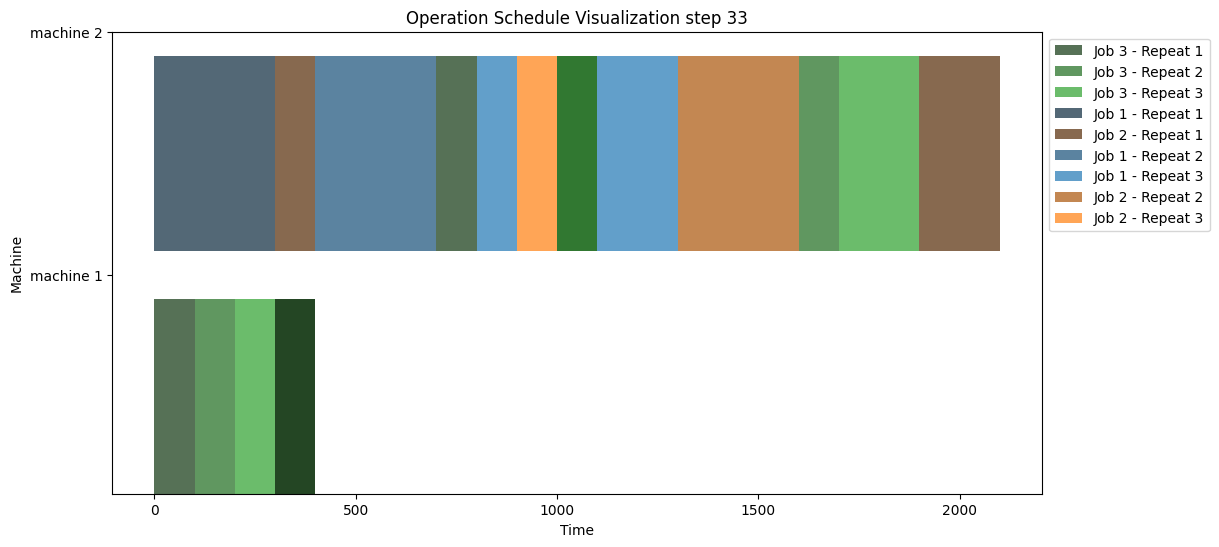

Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
Job 0 has no operations to schedule.
Job 2 has no operations to schedule.
action : 1, 1
[[-1, -1], [2, 1], [-1, -1]]


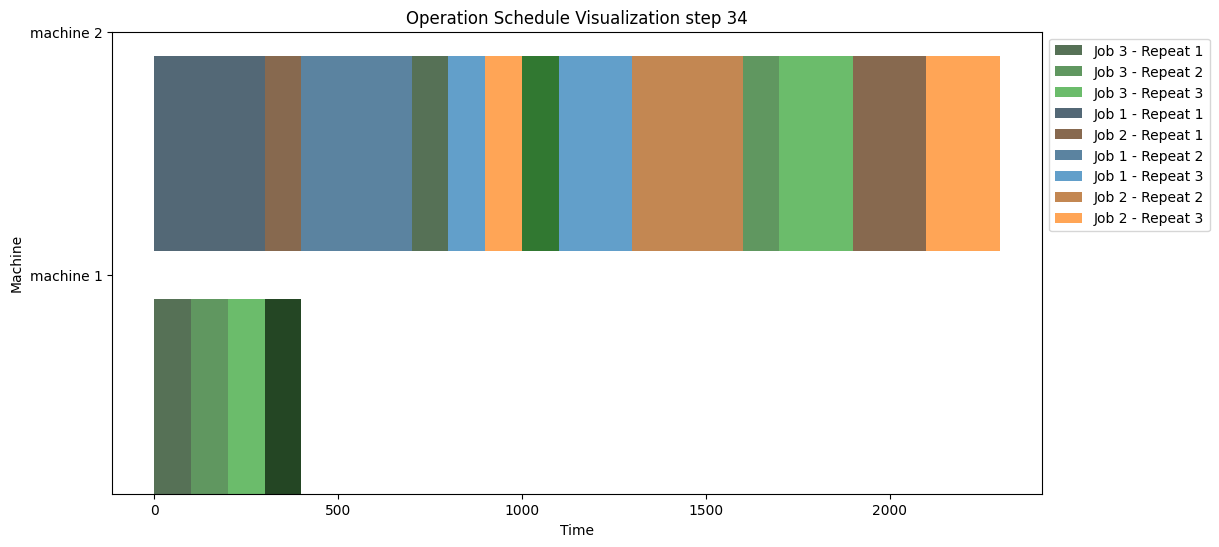

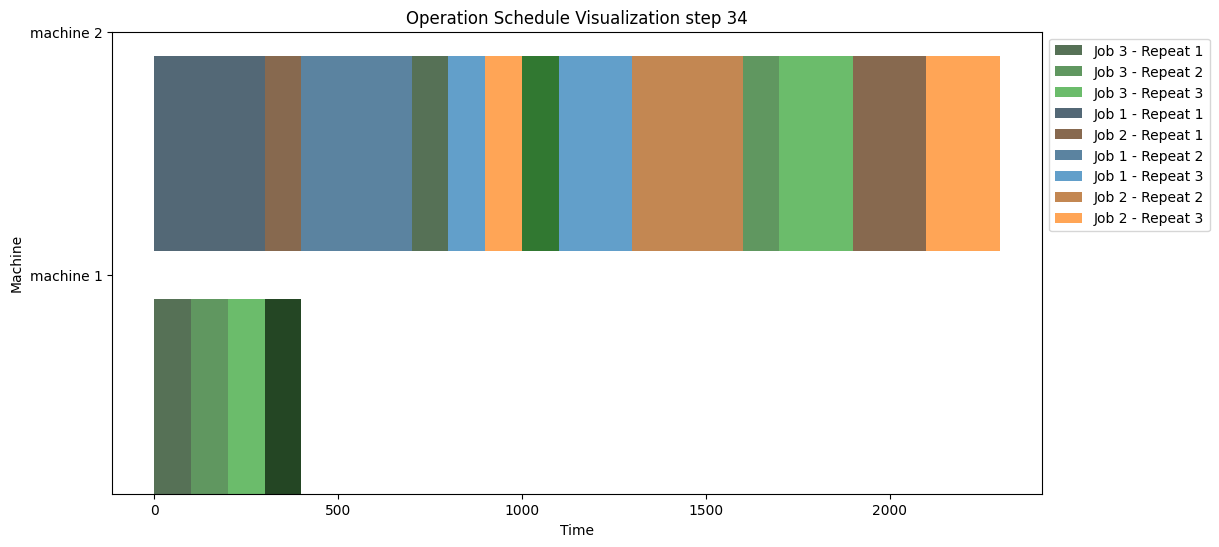

In [8]:
step = 0
obs, info = env.reset()
print(info['schedule_buffer'])

while True:
    step += 1
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    print(f"action : {action // 3}, {action % 3}")
    print(info['schedule_buffer'])
    env.render()

    # env.visualize_graph()
    done = terminated or truncated
    
    
    if done:
        # print("Goal reached!", "final score=", reward)
        # print('finish_time', info['finish_time'])
        # print('job_density', info['job_density'])
        # print('machine_operation_rate', info['machine_operation_rate'])
        # print('job_deadline', info['job_deadline'])
        # print('job_time_exceeded', info['job_time_exceeded'])
        env.render()
        break

In [ ]:
model = PPO('MultiInputPolicy', env, verbose=1).learn(200000)

In [ ]:
obs, info = env.reset()
while True:
    action, _ = model.predict(obs, deterministic = True)
    print(f"action : {action // 3}, {action % 3}")
    obs, reward, terminated, truncated, info = env.step(action)
    print(info['schedule_buffer'])
    done = terminated or truncated
    if done:
        print("Goal reached!", "final score=", reward)
        print('finish_time', info['finish_time'])
        print('machine_operation_rate', info['machine_operation_rate'])
        print('job_deadline', info['job_deadline'])
        print('job_time_exceeded', info['job_time_exceeded'])
        env.render()
        break